### libraries and global variables

In [17]:
import pandas as pd         # dataset calcualtions
import numpy as np

import seaborn as sns       # data visualization (in EDA and buidling model)
import matplotlib.pyplot as plt

import xgboost as xgb       # building a model
from sklearn.metrics import classification_report, roc_auc_score



credit_features = pd.read_csv('dataset/credit_features_subset.csv')
loan_applications = pd.read_csv('dataset/loan_applications.csv')

merged_data = pd.merge( credit_features, loan_applications, on='UID', how='left' )

### Exploratory data analysis

In [18]:
print(f'merged_data.dtypes:\n{merged_data.dtypes}')

merged_data.dtypes:
UID                                       int64
ALL_AgeOfOldestAccount                    int64
ALL_AgeOfYoungestAccount                  int64
ALL_Count                                 int64
ALL_CountActive                           int64
ALL_CountClosedLast12Months               int64
ALL_CountDefaultAccounts                  int64
ALL_CountOpenedLast12Months               int64
ALL_CountSettled                          int64
ALL_MeanAccountAge                      float64
ALL_SumCurrentOutstandingBal              int64
ALL_SumCurrentOutstandingBalExcMtg        int64
ALL_TimeSinceMostRecentDefault            int64
ALL_WorstPaymentStatusActiveAccounts      int64
ApplicationDate                          object
Amount                                    int64
Term                                      int64
EmploymentType                           object
LoanPurpose                              object
Success                                   int64
dtype: object


In [19]:
merged_data.head(20)

,UID,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_TimeSinceMostRecentDefault,ALL_WorstPaymentStatusActiveAccounts,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success
0,216009,227,12,14,11,0,3,0,3,71.36,9292,9292,-1,7,01/01/2020,7000,36,Employed - full time,purchase,0
1,217537,49,10,7,6,1,3,1,1,29.33,4592,4592,-1,7,01/01/2020,1000,60,Employed - full time,cosmetic surgery,0
2,221803,134,0,12,11,0,3,5,1,32.33,2737,2737,-1,7,01/01/2020,2000,24,Employed - part time,Consolidation,0
3,222260,227,2,39,12,0,2,2,27,41.56,9229,9229,-1,7,01/01/2020,4000,48,Employed - full time,Child expenses,0
4,222848,132,2,99,11,8,0,9,88,43.34,15443,15443,-1,0,01/01/2020,7000,60,Employed - full time,New machine,0
5,223136,16,1,14,10,4,0,11,4,7.00,1010,1010,-1,0,01/01/2020,2000,12,Employed - full time,Loan settlement,0
6,225032,127,13,16,12,0,1,0,4,46.94,5833,5833,-1,7,01/01/2020,5000,30,Retired,set up a home,0
7,225204,178,27,11,8,0,0,0,3,72.55,18040,18040,-1,0,01/01/2020,15000,36,Employed - full time,Tax,0
8,225703,104,4,15,12,2,0,6,3,25.60,11606,11606,-1,2,01/01/2020,1000,36,Employed - full time,Consolidation,0
9,227350,141,13,6,4,1,3,0,2,64.50,2803,2803,-1,7,01/01/2020,5000,24,Employed - full time,debt consolidation,0


Text(0.5, 1.0, 'How many loans were accepted')

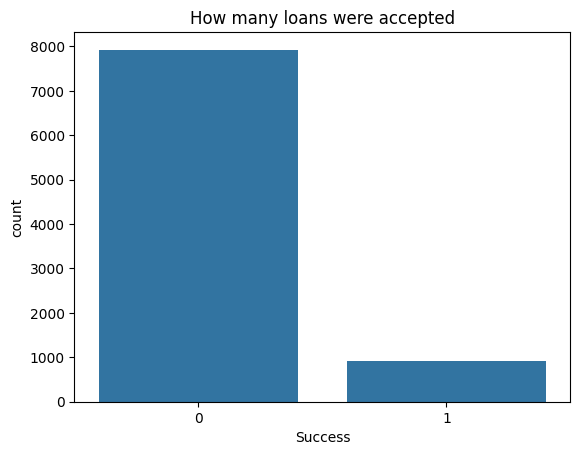

In [ ]:
sns.countplot( x='Success', data=merged_data )
plt.title('How many loans were accepted?')

In [22]:
print(merged_data.isnull().sum())

UID                                     0
ALL_AgeOfOldestAccount                  0
ALL_AgeOfYoungestAccount                0
ALL_Count                               0
ALL_CountActive                         0
ALL_CountClosedLast12Months             0
ALL_CountDefaultAccounts                0
ALL_CountOpenedLast12Months             0
ALL_CountSettled                        0
ALL_MeanAccountAge                      0
ALL_SumCurrentOutstandingBal            0
ALL_SumCurrentOutstandingBalExcMtg      0
ALL_TimeSinceMostRecentDefault          0
ALL_WorstPaymentStatusActiveAccounts    0
ApplicationDate                         0
Amount                                  0
Term                                    0
EmploymentType                          0
LoanPurpose                             0
Success                                 0
dtype: int64


### Building a model

### Model testing and results